<a href="https://colab.research.google.com/github/ShauThongHo/Practical-Discrete-Mathematics/blob/master/Exercise12/4/2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install mediapipe opencv-python-headless

In [1]:
!pip install cv

In [13]:
!pip install requests pillow matplotlib

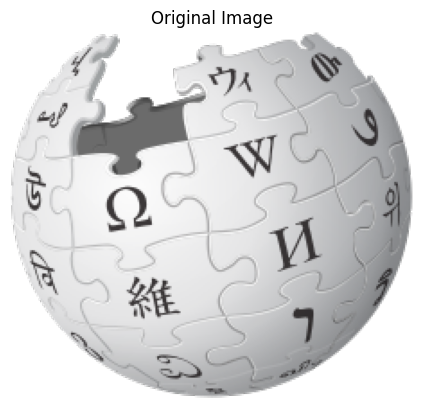

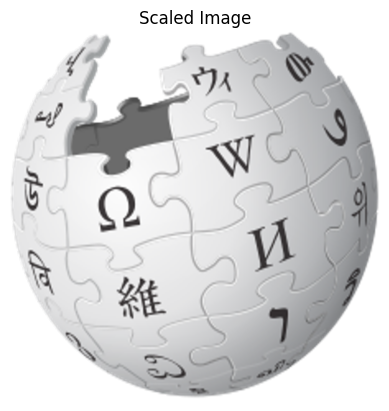

In [3]:
#get the info
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Load the image
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Wikipedia-logo-v2.svg/225px-Wikipedia-logo-v2.svg.png'  # Replace with your image URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Display the original image
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Scale the image
new_size = (2160, 2160)  # Replace with your desired size
scaled_img = img.resize(new_size)

# Display the scaled image
plt.imshow(scaled_img)
plt.title('Scaled Image')
plt.axis('off')
plt.show()

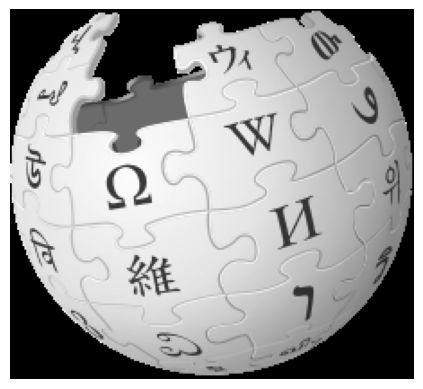

In [6]:
#Q4
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Function to download an image from a URL
def download_image(url):
    response = requests.get(url)
    response.raise_for_status()  # Check if the request was successful
    return Image.open(BytesIO(response.content))

# URL of the image
image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Wikipedia-logo-v2.svg/225px-Wikipedia-logo-v2.svg.png'

# Download the image
img = download_image(image_url)

# Convert the image to grayscale
gray_img = img.convert('L')

# Display the grayscale image
plt.imshow(gray_img, cmap='gray')
plt.axis('off')  # Hide the axes
plt.show()

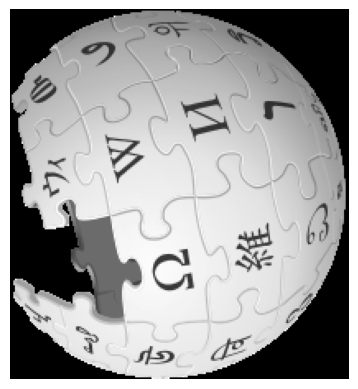

In [7]:
#Q2
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Function to download an image from a URL
def download_image(url):
    response = requests.get(url)
    response.raise_for_status()  # Check if the request was successful
    return Image.open(BytesIO(response.content))

# URL of the image
image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Wikipedia-logo-v2.svg/225px-Wikipedia-logo-v2.svg.png'

# Download the image
img = download_image(image_url)

# Convert the image to grayscale
gray_img = img.convert('L')

# Transpose the image 90 degrees
transposed_img = gray_img.transpose(Image.ROTATE_90)

# Display the transposed grayscale image
plt.imshow(transposed_img, cmap='gray')
plt.axis('off')  # Hide the axes
plt.show()

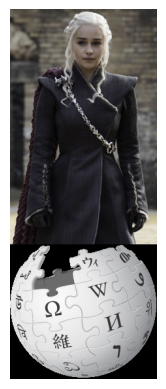

In [14]:
#Q3
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Function to download an image from a URL
def download_image(url):
    response = requests.get(url)
    response.raise_for_status()  # Check if the request was successful
    return Image.open(BytesIO(response.content))

# URLs of the Creative Commons images
image_url1 = 'https://vignette.wikia.nocookie.net/gameofthrones/images/2/25/707_Daenerys_Profil.jpg/revision/latest?cb=20170829215522&path-prefix=de'
image_url2 = 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Wikipedia-logo-v2.svg/225px-Wikipedia-logo-v2.svg.png'

# Download the images
img1 = download_image(image_url1)
img2 = download_image(image_url2)

# Ensure both images have the same width
width = min(img1.width, img2.width)
img1 = img1.resize((width, int(img1.height * width / img1.width)))
img2 = img2.resize((width, int(img2.height * width / img2.width)))

# Combine images vertically
combined_height = img1.height + img2.height
combined_img = Image.new('RGB', (width, combined_height))
combined_img.paste(img1, (0, 0))
combined_img.paste(img2, (0, img1.height))

# Display the combined image
plt.imshow(combined_img)
plt.axis('off')  # Hide the axes
plt.show()

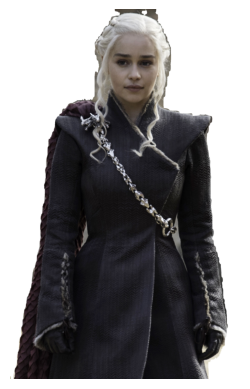

In [18]:
#Q1
import requests
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO

# Function to download an image from a URL
def download_image(url):
    response = requests.get(url)
    response.raise_for_status()  # Check if the request was successful
    image = Image.open(BytesIO(response.content))
    return cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# URL of the image
image_url = 'https://vignette.wikia.nocookie.net/gameofthrones/images/2/25/707_Daenerys_Profil.jpg/revision/latest?cb=20170829215522&path-prefix=de'

# Download the image
image = download_image(image_url)

# Convert the image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Load the Mediapipe Selfie Segmentation
mp_selfie_segmentation = mp.solutions.selfie_segmentation.SelfieSegmentation(model_selection=1)

# Process the image
result = mp_selfie_segmentation.process(image_rgb)

# Create a mask and apply it
mask = result.segmentation_mask > 0.1  # Threshold for background removal
image_no_bg = image_rgb.copy()
image_no_bg[~mask] = [255, 255, 255]  # Set background to white

# Display the result
plt.imshow(image_no_bg)
plt.axis("off")
plt.show()